<a href="https://colab.research.google.com/github/rdkdaniel/The-Swahili-Project/blob/main/Building_the_tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Dataset**

In [ ]:
#Install the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [ ]:
#Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
#Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading dataset
! kaggle datasets download samwelobunde/swahili-data

 98% 499M/508M [00:03<00:00, 164MB/s]
100% 508M/508M [00:03<00:00, 163MB/s]


## **Unzip dataset**

In [ ]:
!unzip swahili-data.zip

**View the downloaded and unzipped dataset**

# **Continue with the tokenizer**

**Import the Required Models and Trainers**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.3 MB/s 
     |████████████████████████████████| 163 kB 58.1 MB/s 
     |████████████████████████████████| 6.6 MB 37.5 MB/s 


In [ ]:
import transformers

In [ ]:
## importing the tokenizer and subword BPE trainer
from tokenizers import Tokenizer
from tokenizers.models import BPE, Unigram, WordLevel, WordPiece
from tokenizers.trainers import BpeTrainer, WordLevelTrainer, \
                                WordPieceTrainer, UnigramTrainer

## a pretokenizer to segment the text into words
from tokenizers.pre_tokenizers import Whitespace

**Automating Training and Tokenization: Having 3 steps**

**Step 1: Preparing the tokenizer**

In [ ]:
unk_token = "<UNK>"  # token for unknown words
spl_tokens = ["<UNK>", "<SEP>", "<MASK>", "<CLS>"]  # special tokens

def prepare_tokenizer_trainer(alg):
    """
    Prepares the tokenizer and trainer with unknown & special tokens.
    """
    if alg == 'BPE':
        tokenizer = Tokenizer(BPE(unk_token = unk_token))
        trainer = BpeTrainer(special_tokens = spl_tokens)
    elif alg == 'UNI':
        tokenizer = Tokenizer(Unigram())
        trainer = UnigramTrainer(unk_token= unk_token, special_tokens = spl_tokens)
    elif alg == 'WPC':
        tokenizer = Tokenizer(WordPiece(unk_token = unk_token))
        trainer = WordPieceTrainer(special_tokens = spl_tokens)
    else:
        tokenizer = Tokenizer(WordLevel(unk_token = unk_token))
        trainer = WordLevelTrainer(special_tokens = spl_tokens)
    
    tokenizer.pre_tokenizer = Whitespace()
    return tokenizer, trainer

**Step 2 - Training the tokenizer**

In [ ]:
def train_tokenizer(files, alg='WLV'):
    """
    Takes the files and trains the tokenizer.
    """
    tokenizer, trainer = prepare_tokenizer_trainer(alg)
    tokenizer.train(files, trainer) # training the tokenzier
    tokenizer.save("./tokenizer-trained.json")
    tokenizer = Tokenizer.from_file("./tokenizer-trained.json")
    return tokenizer

**Step 3 - Tokenizing the input string**

In [ ]:
#https://www.freecodecamp.org/news/train-algorithms-from-scratch-with-hugging-face/

In [ ]:
small_file = ['Test.csv']
large_files = ['Train.csv']

for files in [small_file, large_files]:
    print(f"========Using vocabulary from {files}=======")
    for alg in ['WLV', 'BPE', 'UNI', 'WPC']:
        trained_tokenizer = train_tokenizer(files, alg)
        input_string = "This is a deep learning tokenization tutorial. Tokenization is the first step in a deep learning NLP pipeline. We will be comparing the tokens generated by each tokenization model. Excited much?!😍"
        output = tokenize(input_string, trained_tokenizer)
        tokens_dict[alg] = output.tokens
        print("----", alg, "----")
        print(output.tokens, "->", len(output.tokens))

========Using vocabulary from ['Test.csv']=======


NameError: ignored

# **Tokenizer Test 1**



*   For data, the one we got from kaggle was audio data.
*   Therefore, went for the old dataset in csv (upload from local pc).



## **Data Formatting**

In [ ]:
import os

os.mkdir('/content/drive/MyDrive/Kiswahili_Dataset3')

In [ ]:
from tqdm.auto import tqdm  # for our loading bar

text_data = []
file_count = 0

for sample in tqdm('/content/train.csv'):
    # remove newline characters from each sample as we need to use exclusively as seperators
 
    text_data.append(sample)
    if len(text_data) == 5_000:
        # once we hit the 5K mark, save to file
        with open(f'/content/drive/MyDrive/Kiswahili_Dataset3/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(text_data))
        text_data = []
        file_count += 1
# after saving in 5K chunks, we may have leftover samples, we save those now too
with open(f'/content/drive/MyDrive/Kiswahili_Dataset3/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(text_data))

  0%|          | 0/18 [00:00<?, ?it/s]

## **Training**

In [ ]:
from pathlib import Path
paths = [str(x) for x in Path('/content/drive/MyDrive/Kiswahili_Dataset3').glob('**/*.txt')]
paths[:5]

['/content/drive/MyDrive/Kiswahili_Dataset3/text_0.txt']

In [ ]:
len(paths)

1

### **Library**

In [6]:
!pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.3 MB/s 


In [7]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.4 MB/s 


In [ ]:
from tokenizers import BertWordPieceTokenizer

### **Initialize and Train**

In [ ]:
tokenizer = BertWordPieceTokenizer(
    clean_text=True,
    handle_chinese_chars=False,
    strip_accents=False,
    lowercase=False
)
# and train
tokenizer.train(files=paths, vocab_size=30_000, min_frequency=2,
                limit_alphabet=1000, wordpieces_prefix='##',
                special_tokens=[
                    '[PAD', '[UNK]', '[CLS]', '[SEP]', '[MASK]'])

In [ ]:

tokenizer.save_model('/content/drive/MyDrive/Kiswahili_Dataset3', 'kisw-tokenizer')



['/content/drive/MyDrive/Kiswahili_Dataset3/kisw-tokenizer-vocab.txt']

## **Using the Tokenizer**

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/Kiswahili_Dataset3/kisw-tokenizer-vocab.txt')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1682: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  FutureWarning,
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
tokenizer('Habari yako?')  # how are you?

{'input_ids': [2, 1, 1, 1, 3], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
with open('/content/drive/MyDrive/Kiswahili_Dataset3/kisw-tokenizer-vocab.txt', 'r') as fp:
    vocab = fp.read().split('\n')

In [ ]:
vocab[2], vocab[1], vocab[1], \
    vocab[1], vocab[1], vocab[3]

('[CLS]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[SEP]')

# **Tokenizer Test 2**

## **Libraries**

In [1]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 5.4 MB/s 
     |████████████████████████████████| 163 kB 51.5 MB/s 
     |████████████████████████████████| 115 kB 46.4 MB/s 
     |████████████████████████████████| 212 kB 56.4 MB/s 
     |████████████████████████████████| 95 kB 3.4 MB/s 
     |████████████████████████████████| 127 kB 63.5 MB/s 
     |████████████████████████████████| 115 kB 51.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [2]:
#Libraries
import pandas as pd
import numpy as np
import datasets

## **Loading Dataset**

In [ ]:
df = pd.read_csv(r'/content/train.csv')
print(df)

            id                                            content category
0       SW4670   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi
1      SW30826   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa
2      SW29725  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi
3      SW20901   TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo
4      SW12560   Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa
...        ...                                                ...      ...
23263  SW24920   Alitoa pongezi hizo alipozindua rasmi hatua y...   uchumi
23264   SW4038   Na NORA DAMIAN-DAR ES SALAAM  TEKLA (si jina ...  kitaifa
23265  SW16649   Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...   uchumi
23266  SW23291   MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...  michezo
23267  SW11778   WIKI iliyopita, nilianza makala haya yanayole...  kitaifa

[23268 rows x 3 columns]


## **Train**

### **More Libraries**

In [8]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from tokenizers import models

In [9]:
tokenizer = Tokenizer(models.WordPiece(unk_token='[UNK]'))

In [10]:
from tokenizers import normalizers
tokenizer.normalizer = normalizers.Sequence(
    [normalizers.Lowercase(), normalizers.NFKD()]
)

In [11]:
from tokenizers import pre_tokenizers
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

In [12]:
from tokenizers import trainers

trainer = trainers.WordPieceTrainer(
    vocab_size=30_000,
    special_tokens=['[UNK]', '[PAD]', '[CLS]', '[SEP]', '[MASK]'],
    min_frequency=2,
    continuing_subword_prefix='##'
)

In [ ]:
tokenizer.train_from_iterator(df, trainer=trainer)

## **Post Processing**

In [ ]:


from tokenizers import processors

# first we get the token ID values (defined in the vocab) for CLS and SEP
cls_id = tokenizer.token_to_id('[CLS]')
sep_id = tokenizer.token_to_id('[SEP]')

# then setup the post processing step with TemplateProcessing
tokenizer.post_processor = processors.TemplateProcessing(
    single=f'[CLS]:0 $A:0 [SEP]:0',
    pair=f'[CLS]:0 $A:0 [SEP]:0 $B:1 [SEP]:1',
    special_tokens=[
        ('[CLS]', cls_id),
        ('[SEP]', sep_id)
    ]
)

## **Decoder**

In [ ]:
from tokenizers import decoders

tokenizer.decoder = decoders.WordPiece(prefix='##')

## **Saving the Tokenizer**

In [ ]:
from transformers import PreTrainedTokenizerFast

# load the tokenizer in a transformers tokenizer instance
tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=tokenizer,
    unk_token='[UNK]',
    pad_token='[PAD]',
    cls_token='[CLS]',
    sep_token='[SEP]',
    mask_token='[MASK]'
)

# save the tokenizer
tokenizer.save_pretrained('Kisw-Tokenizer-rdk')

('Kisw-Tokenizer-rdk/tokenizer_config.json',
 'Kisw-Tokenizer-rdk/special_tokens_map.json',
 'Kisw-Tokenizer-rdk/tokenizer.json')

## **Using the Tokenizer**

In [ ]:
tokenizer = PreTrainedTokenizerFast.from_pretrained('Kisw-Tokenizer-rdk')

In [ ]:
tokenizer("Ilikuwa wakati wa jioni jua limepunguza udhia wake na upepo mwanana ulikuwa ukipita na kuzipapasa ngozi zetu mfano wa pamba")

{'input_ids': [2, 0, 0, 0, 0, 0, 0, 0, 0, 11, 20, 0, 0, 0, 0, 11, 20, 0, 0, 0, 0, 0, 0, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

# **So, my dataset is the one with the issue.**

# **Tokenizer Test 2**

## **Loading data**

Loading my text data


*   https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas
*   List item



In [3]:
df = pd.read_fwf('/content/Kiswdata1.txt')

In [4]:
print(df)

   Mhadhiri Denis Skopin (kushoto)  akiwa ameshikilia karatasi zake za  \
0  Dikteta wa Soviet Joseph Stalin  amepitia aina  fulani ya ukarabati   

   kufukuzwa kutoka Chuo  Kikuu cha  \
0  katika Urusi ya Putin  - unaweza   

   Jimbo la St PetersburgKatika nyumba yake ya St  \
0  hata kununua bidhaa za Stalin.Mhadhiri wa chuo   

   Petersburg, mhadhiri wa chuo kikuu  \
0  kikuu aliyefutwa kazi Denis Skopin   

  Denis Skopin ananionyesha hati ambayo imebadilisha maisha  \
0  amesoma miaka ya Stalin. Anaona uwiano kati ya...          

  yake.Maelekezo: "Maelekezo No.87/2D. Kuhusu: Kufutwa kazi."Hadi  hivi  \
0  na sasa."Nimetoka kuchapisha kitabu kwa Kiinge...               watu   

   majuzi Denis  ... kusahau madoa ya.23 umwagaji damu ya.24 historia ya.25  \
0  wa  Urusi ya  ...     NaN   NaN   NaN      NaN  NaN   NaN      NaN   NaN   

  nchi.1 yetu."  
0    NaN    NaN  

[1 rows x 402 columns]


## **Train**



*   Laoding libariries from previous test.
*   I will just implment the necessary script here those dependencies are executed.



In [13]:
tokenizer.train_from_iterator(df, trainer=trainer)

## **Post Processing**

In [14]:
from tokenizers import processors

# first we get the token ID values (defined in the vocab) for CLS and SEP
cls_id = tokenizer.token_to_id('[CLS]')
sep_id = tokenizer.token_to_id('[SEP]')

# then setup the post processing step with TemplateProcessing
tokenizer.post_processor = processors.TemplateProcessing(
    single=f'[CLS]:0 $A:0 [SEP]:0',
    pair=f'[CLS]:0 $A:0 [SEP]:0 $B:1 [SEP]:1',
    special_tokens=[
        ('[CLS]', cls_id),
        ('[SEP]', sep_id)
    ]
)

## **Decode**

In [15]:
from tokenizers import decoders

tokenizer.decoder = decoders.WordPiece(prefix='##')

## **Saving the Tokenizer**

In [16]:
from transformers import PreTrainedTokenizerFast

# load the tokenizer in a transformers tokenizer instance
tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=tokenizer,
    unk_token='[UNK]',
    pad_token='[PAD]',
    cls_token='[CLS]',
    sep_token='[SEP]',
    mask_token='[MASK]'
)

# save the tokenizer
tokenizer.save_pretrained('Kisw-Tokenizer-rdk2')

('Kisw-Tokenizer-rdk2/tokenizer_config.json',
 'Kisw-Tokenizer-rdk2/special_tokens_map.json',
 'Kisw-Tokenizer-rdk2/tokenizer.json')

## **Using the Tokenizer**

In [17]:
tokenizer = PreTrainedTokenizerFast.from_pretrained('Kisw-Tokenizer-rdk2')

In [18]:
tokenizer("Ilikuwa wakati wa jioni jua limepunguza udhia wake na upepo mwanana ulikuwa ukipita na kuzipapasa ngozi zetu mfano wa pamba")

{'input_ids': [2, 219, 211, 343, 87, 283, 265, 36, 299, 38, 57, 151, 55, 403, 134, 161, 46, 224, 51, 308, 104, 46, 396, 251, 286, 102, 102, 46, 89, 211, 246, 57, 222, 110, 104, 90, 109, 297, 297, 140, 40, 250, 109, 50, 54, 114, 39, 225, 66, 87, 383, 126, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

# **SUCCESSS!!!!**

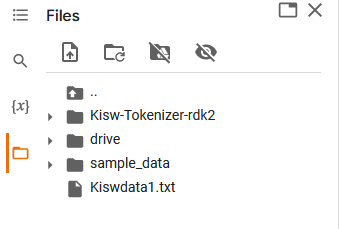